In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
data = datasets.load_wine(as_frame=True)

In [2]:
data

{'data':      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
 0      14.23        1.71  2.43               15.6      127.0           2.80   
 1      13.20        1.78  2.14               11.2      100.0           2.65   
 2      13.16        2.36  2.67               18.6      101.0           2.80   
 3      14.37        1.95  2.50               16.8      113.0           3.85   
 4      13.24        2.59  2.87               21.0      118.0           2.80   
 ..       ...         ...   ...                ...        ...            ...   
 173    13.71        5.65  2.45               20.5       95.0           1.68   
 174    13.40        3.91  2.48               23.0      102.0           1.80   
 175    13.27        4.28  2.26               20.0      120.0           1.59   
 176    13.17        2.59  2.37               20.0      120.0           1.65   
 177    14.13        4.10  2.74               24.5       96.0           2.05   
 
      flavanoids  nonflavanoid

In [3]:
x = data.data
y = data.target

In [4]:
names = data.target_names
print(names)

['class_0' 'class_1' 'class_2']


In [5]:
df = pd.DataFrame(x, columns = data.feature_names)

In [6]:
df['wine class']= data.target
df['wine class'] = df['wine class'].replace(to_replace=[0,1,2], value=['class_0', 'class_1', 'class_2'])

In [7]:
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline wine class  
0                            3.92   1065.0    class_0  
1                            3.40   1050.0    class_0  
2                            3.17   1185.0    class_0  
3                            3.45   1480.0    class_0  
4                            2.93    735.0    class_0  
..                            ...      ...        ...  
173                          1.74    740.0    class_2  
174                          1.56    750.0    class_2  
175                          1.56    835.0    class_2  
176                          1.62    840.0    class_2  
177                          1.60    560.0    class_2  

[178 rows x 14 columns]

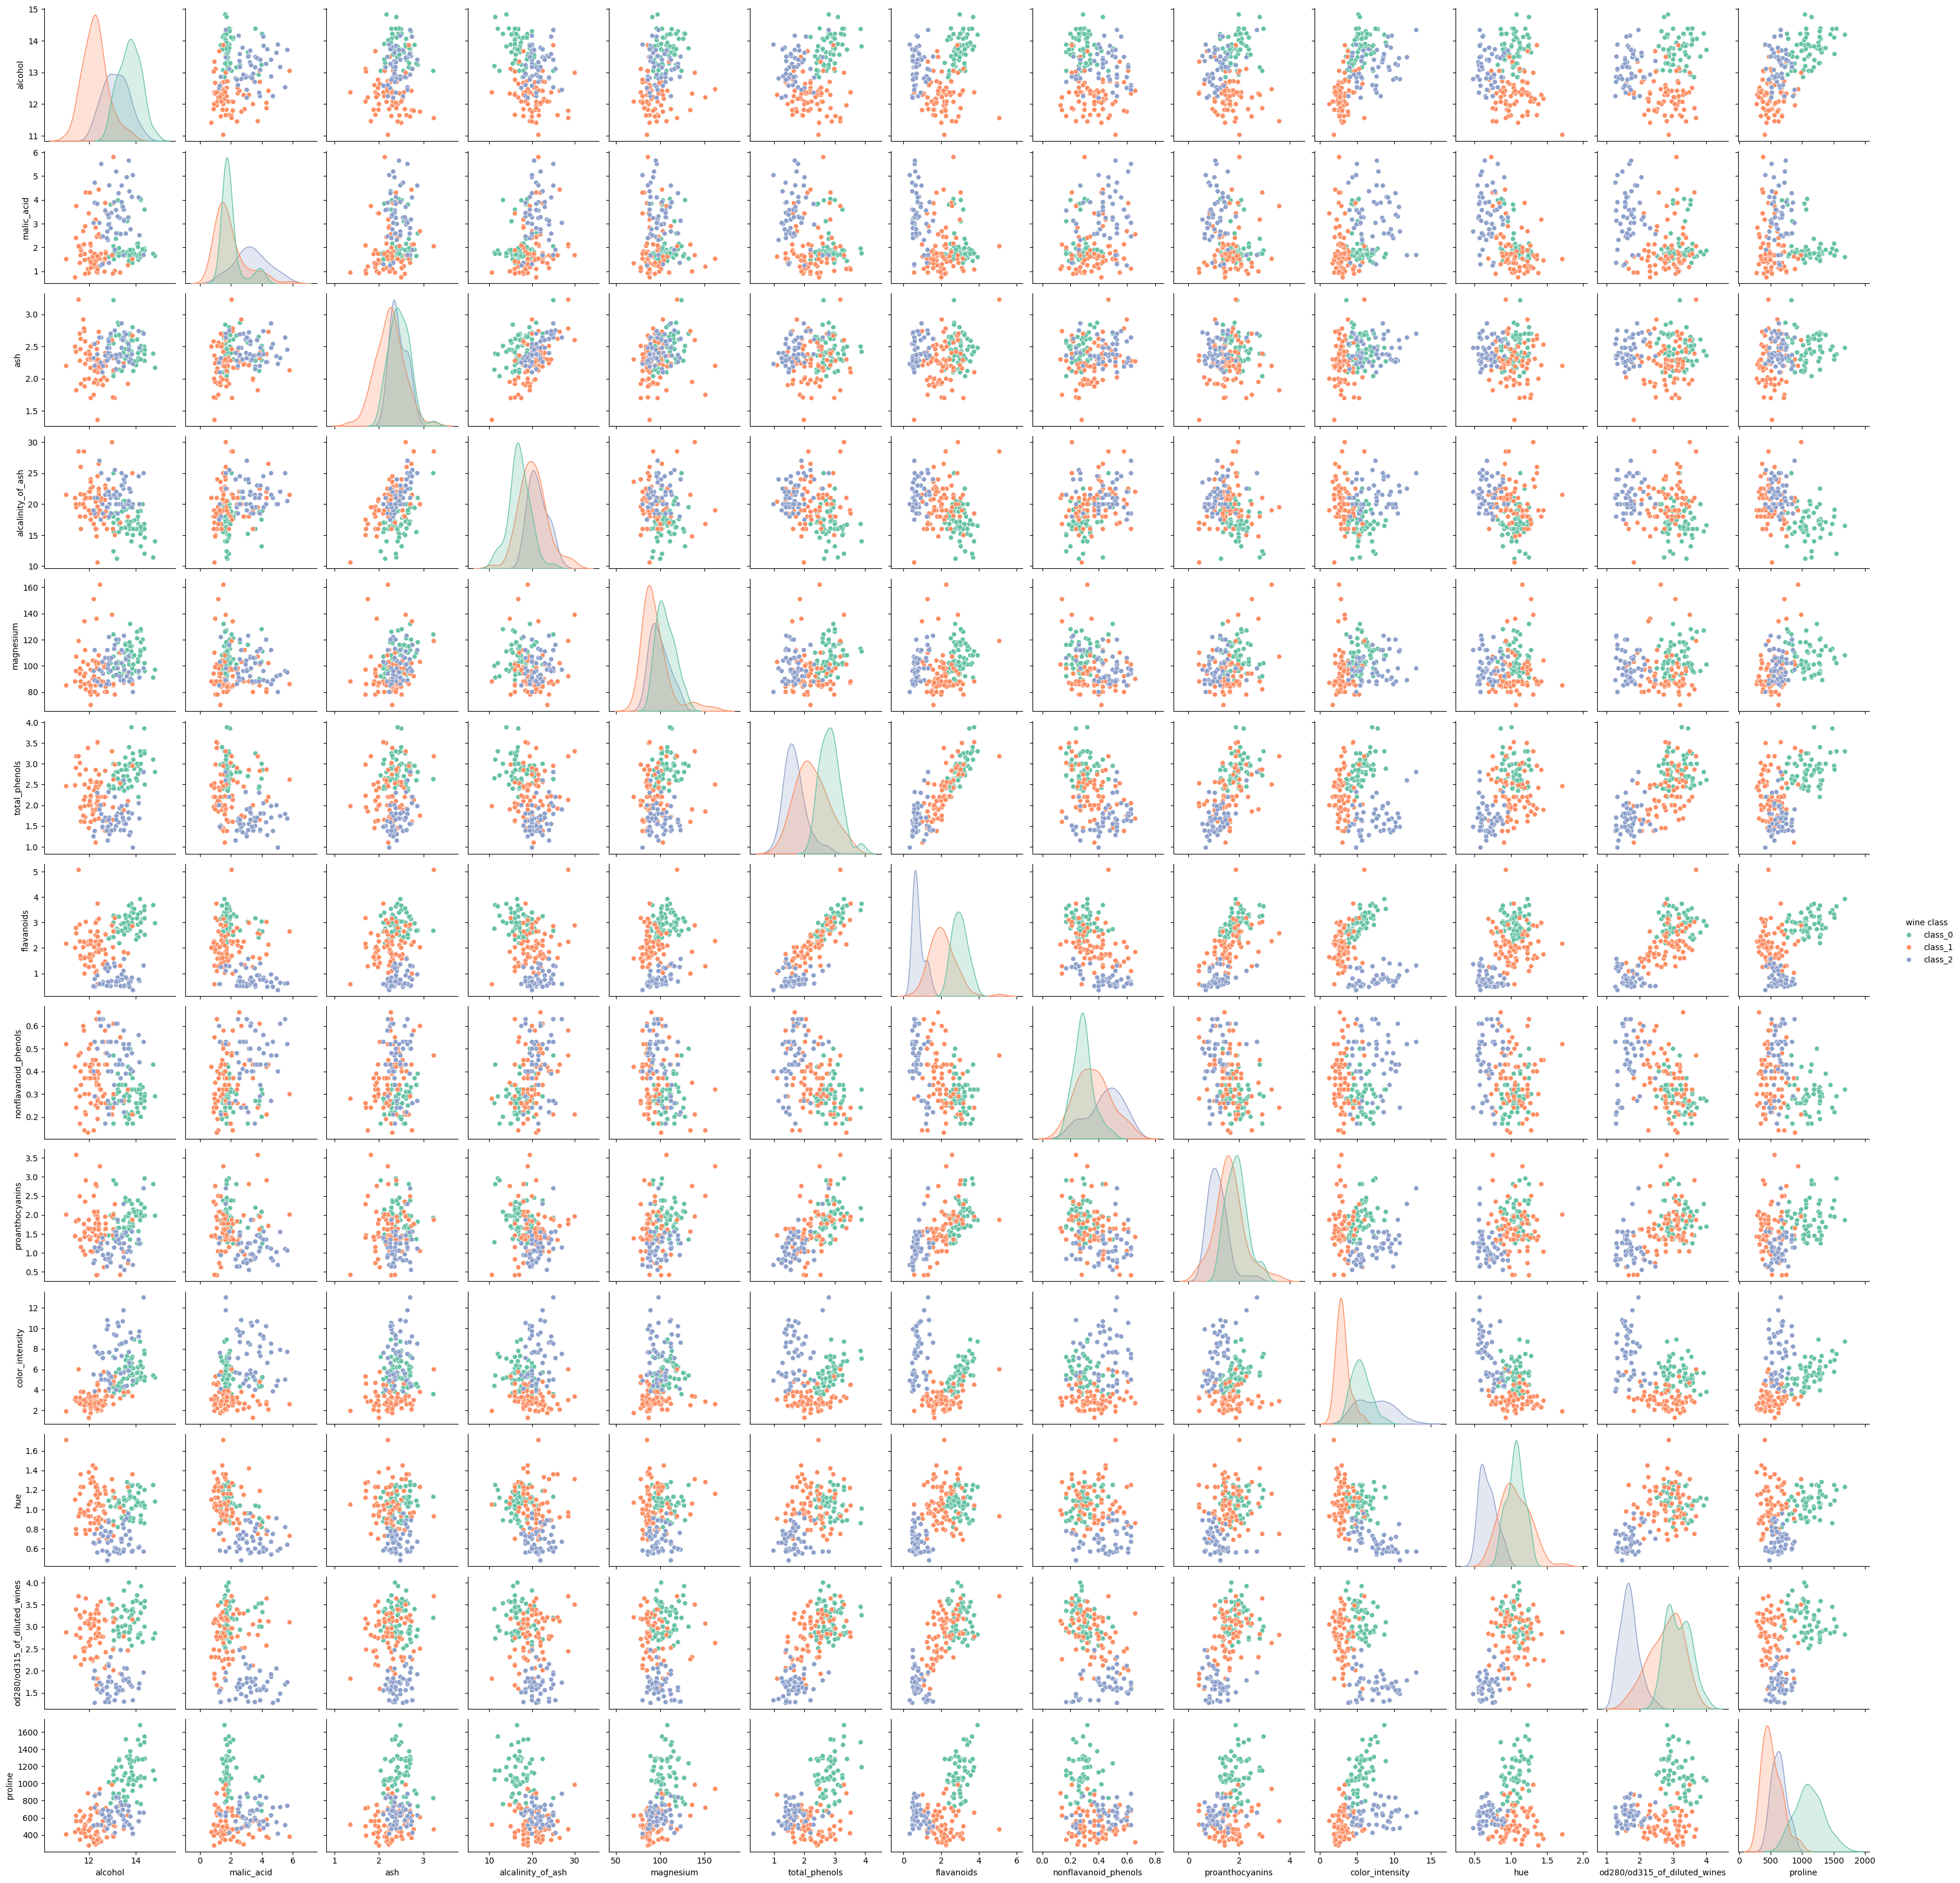

In [8]:
sns.pairplot(data = df, hue = 'wine class', palette='Set2')

In [9]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
wine class                      0
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
import math
math.sqrt(len(y_test))

7.3484692283495345

In [14]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [15]:
pred = knn.predict(x_test)

In [16]:
from sklearn import metrics

In [17]:
metrics.accuracy_score(y_test, pred)

0.6481481481481481

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [40]:
knn1 = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn1.fit(x_train, y_train)
pred2 = knn1.predict(x_test)
metrics.accuracy_score(y_test, pred2)

0.9814814814814815